## Import modules

In [1]:
# For data processing
import numpy as np
import pandas as pd

# For plotting data
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# For data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# For handling imbalanced dataset
from imblearn.combine import SMOTETomek
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Show all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [37]:
# Read the CSV file into a DataFrame
asteroids_df = pd.read_csv('./datasets/cleaned_nasa_data.csv')

# Assuming you have a DataFrame 'asteroids_df' containing the estimated diameter and relative velocity
# Calculate the impact risk using the provided formula
asteroids_df['IMPACT_RISK'] = asteroids_df['EST_DIA_IN_M(MIN)'] * asteroids_df['RELATIVE_VELOCITY_KM_PER_SEC']

# Define quartiles for categorization based on your criteria
first_quartile = asteroids_df['IMPACT_RISK'].quantile(0.25)
third_quartile = asteroids_df['IMPACT_RISK'].quantile(0.75)

print("25% quartile:", first_quartile)
print("75% quartile:", third_quartile,"\n")

# Define function to determine risk category based on quartiles and hazardous status
def risk_category(risk, hazardous):
    if risk < first_quartile and hazardous == 0:
        return 0
    elif (risk >= first_quartile and risk <= third_quartile) and (hazardous == 0 or (risk < first_quartile and hazardous == 1)):
        return 1
    elif risk > third_quartile or (risk >= first_quartile and risk <= third_quartile and hazardous == 1):
        return 2

# Apply the function to categorize impact risk into low, medium, and high based on thresholds
asteroids_df['RISK_CATEGORY'] = asteroids_df.apply(lambda row: risk_category(row['IMPACT_RISK'], row['HAZARDOUS']), axis=1)

# Check the distribution of risk categories
print(asteroids_df['RISK_CATEGORY'].value_counts())

# Convert True to 1 and False to 0
asteroids_df['HAZARDOUS'] = asteroids_df['HAZARDOUS'].replace({True: 1, False: 0})

asteroids_df

25% quartile: 307.4192550874627
75% quartile: 3164.2857835593154 

RISK_CATEGORY
1    1551
2    1239
0     930
Name: count, dtype: int64


C:\Users\ZX\AppData\Local\Temp\ipykernel_13376\2659470715.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  asteroids_df['HAZARDOUS'] = asteroids_df['HAZARDOUS'].replace({True: 1, False: 0})


,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS,IMPACT_RISK,RISK_CATEGORY
0,3703080,127.219878,284.472297,6.115834,6.275369e+07,0.808259,2.005764,2458161.642,264.837533,0.590551,1,778.055708,2
1,3723955,146.067964,326.617897,18.113985,5.729815e+07,0.718200,1.497352,2457794.969,173.741112,0.845330,0,2645.872919,1
2,2446862,231.502122,517.654482,7.590711,7.622912e+06,0.950791,1.966857,2458120.468,292.893654,0.559371,1,1757.265743,2
3,3092506,8.801465,19.680675,11.173875,4.268362e+07,0.983902,1.527904,2457902.337,68.741007,0.700277,0,98.346468,0
4,3514799,127.219878,284.472297,9.840831,6.101082e+07,0.967687,1.483543,2457814.455,135.142133,0.726395,1,1251.949331,2
5,3671135,319.561887,714.562102,10.808844,5.875977e+07,0.577800,2.069265,2458009.403,354.237368,0.647295,0,3454.094569,2
6,2495323,319.561887,714.562102,10.808842,5.875953e+07,0.577800,2.069265,2458009.403,354.237396,0.647295,0,3454.093812,2
7,2153315,384.197891,859.092601,24.421884,1.932493e+07,0.680905,1.794045,2458242.439,186.776932,0.715978,0,9382.836326,2
8,2306383,133.215567,297.879063,12.899610,2.270982e+07,0.393040,1.359211,2457900.770,119.861382,1.201862,1,1718.428819,2
9,3444370,88.014652,196.806745,22.421366,3.007515e+07,0.426618,1.201135,2457996.360,5.556806,1.342351,0,1973.408755,1


Class=2, n=1239 (33.306%)
Class=1, n=1551 (41.694%)
Class=0, n=930 (25.000%)


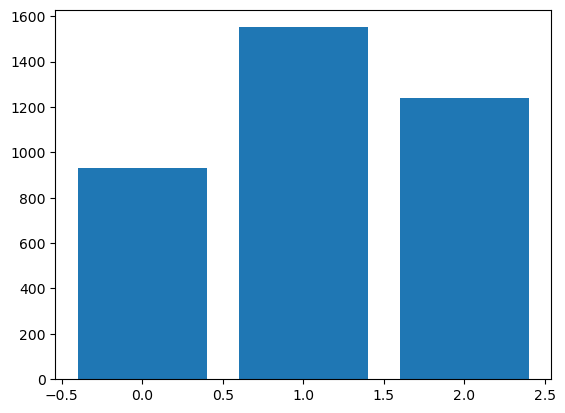

In [3]:
# Split the DF into predictors and response
x, y = asteroids_df.iloc[:, :-1], asteroids_df.iloc[:, -1]

# summarize distribution
counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

The classes are imbalanced.

RISK_CATEGORY

0 (low) - 930

1 (med) - 1551

2 (high) - 1239

In [4]:
asteroids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NEO_REFERENCE_ID              3720 non-null   int64  
 1   EST_DIA_IN_M(MIN)             3720 non-null   float64
 2   EST_DIA_IN_M(MAX)             3720 non-null   float64
 3   RELATIVE_VELOCITY_KM_PER_SEC  3720 non-null   float64
 4   MISS_DIST.(KILOMETERS)        3720 non-null   float64
 5   PERIHELION_DISTANCE           3720 non-null   float64
 6   APHELION_DIST                 3720 non-null   float64
 7   PERIHELION_TIME               3720 non-null   float64
 8   MEAN_ANOMALY                  3720 non-null   float64
 9   MEAN_MOTION                   3720 non-null   float64
 10  HAZARDOUS                     3720 non-null   int64  
 11  IMPACT_RISK                   3720 non-null   float64
 12  RISK_CATEGORY                 3720 non-null   int64  
dtypes: 

In [5]:
# Split the dataset into 70% train and 30% test set
# Set random_state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=20)

In [6]:
print("Low Risk vs Medium Risk vs High Risk Train Set Proportion")
print(y_train.value_counts()[0], ':',y_train.value_counts()[1], ':', y_train.value_counts()[2])

Low Risk vs Medium Risk vs High Risk Train Set Proportion
660 : 1072 : 872


In [7]:
train_df = pd.concat([x_train, y_train], axis=1)
train_df = train_df.drop(columns="IMPACT_RISK")
train_df.head()

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS,RISK_CATEGORY
2586,3529625,183.888672,411.187571,9.551351,27837396.0,0.783714,1.338152,2457843.686,141.435423,0.901929,0,1
29,3182169,50.647146,113.250461,3.838017,12937927.0,0.894596,1.275511,2458019.676,343.278084,0.872021,0,0
1677,3256739,253.837029,567.596853,6.477856,72234080.0,1.239713,2.001073,2457878.935,58.087470,0.477830,0,1
1833,3761549,334.622374,748.238376,18.027267,25818802.0,0.993025,1.966328,2458313.630,188.533899,0.547588,1,2
3632,3653520,69.912523,156.329154,24.300910,71082192.0,0.922122,3.114245,2457587.296,142.045632,0.343766,0,1


In [15]:
# Save the dataframe to a CSV file
# train_df.to_csv('./datasets/train.csv')

## Random Oversampling on training data

In [10]:
# Define oversampling strategy with balanced ratios for each class
over_sampler = RandomOverSampler(
    sampling_strategy='auto',  # Automatically adjusts the ratio to balance the classes
    random_state=20
)

# Fit and apply the transform
x_resampled, y_resampled = over_sampler.fit_resample(x_train, y_train)

In [11]:
print("Low Risk vs Medium Risk vs High Risk Train Set Proportion (after oversampling)")
print(y_resampled.value_counts()[0], ':',y_resampled.value_counts()[1], ':', y_resampled.value_counts()[2])

Low Risk vs Medium Risk vs High Risk Train Set Proportion (after oversampling)
1072 : 1072 : 1072


In [12]:
oversampled_train_df = pd.concat([x_resampled, y_resampled], axis=1)
oversampled_train_df = oversampled_train_df.drop(columns="IMPACT_RISK")
oversampled_train_df.head()

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS,RISK_CATEGORY
0,3529625,183.888672,411.187571,9.551351,27837396.0,0.783714,1.338152,2457843.686,141.435423,0.901929,0,1
1,3182169,50.647146,113.250461,3.838017,12937927.0,0.894596,1.275511,2458019.676,343.278084,0.872021,0,0
2,3256739,253.837029,567.596853,6.477856,72234080.0,1.239713,2.001073,2457878.935,58.087470,0.477830,0,1
3,3761549,334.622374,748.238376,18.027267,25818802.0,0.993025,1.966328,2458313.630,188.533899,0.547588,1,2
4,3653520,69.912523,156.329154,24.300910,71082192.0,0.922122,3.114245,2457587.296,142.045632,0.343766,0,1


In [16]:
# Save the dataframe to a CSV file
# oversampled_train_df.to_csv('./datasets/oversampled_train.csv')

## SMOTETomek Resampling on training data
This only applies to numerical variables.

In [18]:
# Select numerical variables 
x_train = x_train[['NEO_REFERENCE_ID','EST_DIA_IN_M(MIN)',
                   'EST_DIA_IN_M(MAX)','RELATIVE_VELOCITY_KM_PER_SEC',
                   'MISS_DIST.(KILOMETERS)','PERIHELION_DISTANCE',
                   'APHELION_DIST','PERIHELION_TIME',
                   'MEAN_ANOMALY','MEAN_MOTION','HAZARDOUS']]
x_train.head()

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS
2586,3529625,183.888672,411.187571,9.551351,27837396.0,0.783714,1.338152,2457843.686,141.435423,0.901929,0
29,3182169,50.647146,113.250461,3.838017,12937927.0,0.894596,1.275511,2458019.676,343.278084,0.872021,0
1677,3256739,253.837029,567.596853,6.477856,72234080.0,1.239713,2.001073,2457878.935,58.087470,0.477830,0
1833,3761549,334.622374,748.238376,18.027267,25818802.0,0.993025,1.966328,2458313.630,188.533899,0.547588,1
3632,3653520,69.912523,156.329154,24.300910,71082192.0,0.922122,3.114245,2457587.296,142.045632,0.343766,0


In [19]:
# Set random_state for reproducibility
smt = SMOTETomek(random_state=20)
x_resampled, y_resampled = smt.fit_resample(x_train, y_train)

In [20]:
print("Low Risk vs Medium Risk vs High Risk Train Set Proportion (after SMOTETomek resampling)")
print(y_resampled.value_counts()[0], ':',y_resampled.value_counts()[1], ':', y_resampled.value_counts()[2])

Low Risk vs Medium Risk vs High Risk Train Set Proportion (after SMOTETomek resampling)
851 : 746 : 819


In [21]:
smotetomek_train_df = pd.concat([x_resampled, y_resampled], axis=1)
smotetomek_train_df.head()

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS,RISK_CATEGORY
0,3182169,50.647146,113.250461,3.838017,12937927.0,0.894596,1.275511,2458019.676,343.278084,0.872021,0,0
1,3256739,253.837029,567.596853,6.477856,72234080.0,1.239713,2.001073,2457878.935,58.087470,0.477830,0,1
2,3761549,334.622374,748.238376,18.027267,25818802.0,0.993025,1.966328,2458313.630,188.533899,0.547588,1,2
3,3653520,69.912523,156.329154,24.300910,71082192.0,0.922122,3.114245,2457587.296,142.045632,0.343766,0,1
4,3071917,265.800000,594.346868,10.896092,33441924.0,1.163723,2.113338,2458007.502,356.709786,0.469918,0,1


In [23]:
# Save the dataframe to a CSV file
# smotetomek_train_df.to_csv('./datasets/smotetomek_train.csv')

## Bootstrapping Resampling on training data

In [24]:
# Select numerical variables 
x_train = x_train[['NEO_REFERENCE_ID','EST_DIA_IN_M(MIN)',
                   'EST_DIA_IN_M(MAX)','RELATIVE_VELOCITY_KM_PER_SEC',
                   'MISS_DIST.(KILOMETERS)','PERIHELION_DISTANCE',
                   'APHELION_DIST','PERIHELION_TIME',
                   'MEAN_ANOMALY','MEAN_MOTION', 'HAZARDOUS']]
x_train.head()

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS
2586,3529625,183.888672,411.187571,9.551351,27837396.0,0.783714,1.338152,2457843.686,141.435423,0.901929,0
29,3182169,50.647146,113.250461,3.838017,12937927.0,0.894596,1.275511,2458019.676,343.278084,0.872021,0
1677,3256739,253.837029,567.596853,6.477856,72234080.0,1.239713,2.001073,2457878.935,58.087470,0.477830,0
1833,3761549,334.622374,748.238376,18.027267,25818802.0,0.993025,1.966328,2458313.630,188.533899,0.547588,1
3632,3653520,69.912523,156.329154,24.300910,71082192.0,0.922122,3.114245,2457587.296,142.045632,0.343766,0


In [25]:
# Determine the minority, majority, and intermediate class labels
unique_labels, label_counts = np.unique(y_train, return_counts=True)
minority_class_label = unique_labels[np.argmin(label_counts)]
majority_class_label = unique_labels[np.argmax(label_counts)]
intermediate_class_label = np.setdiff1d(unique_labels, [minority_class_label, majority_class_label])[0]

# Separate minority, majority, and intermediate class samples
x_minority = x_train[y_train == minority_class_label]
x_majority = x_train[y_train == majority_class_label]
x_intermediate = x_train[y_train == intermediate_class_label]

# Perform bootstrapping on the minority class samples
num_samples_minority = len(x_majority)
x_minority_resampled = resample(x_minority, replace=True, n_samples=num_samples_minority, random_state=20)

# Combine resampled minority class samples with majority and intermediate class samples
x_resampled = np.concatenate((x_majority, x_minority_resampled, x_intermediate))
y_resampled = np.concatenate((np.full(len(x_majority), majority_class_label), 
                               np.full(len(x_minority_resampled), minority_class_label),
                               np.full(len(x_intermediate), intermediate_class_label)))

In [26]:
# Convert y_resampled to a pandas Series
y_resampled_series = pd.Series(y_resampled)

# Print the class proportions
print("Low Risk vs Medium Risk vs High Risk Train Set Proportion (after bootstrapping resampling)")
print(y_resampled_series.value_counts()[0], ':', y_resampled_series.value_counts()[1], ':', y_resampled_series.value_counts()[2])

Low Risk vs Medium Risk vs High Risk Train Set Proportion (after bootstrapping resampling)
1072 : 1072 : 872


In [27]:
# Convert the resampled data into a DataFrame
bootstrapping_train_df = pd.DataFrame(data=np.column_stack((x_resampled, y_resampled)), columns=list(x_train.columns) + ['RISK_CATEGORY'])

# Convert dataframe columns to integers 
bootstrapping_train_df['NEO_REFERENCE_ID'] = bootstrapping_train_df['NEO_REFERENCE_ID'].astype(int)
bootstrapping_train_df['RISK_CATEGORY'] = bootstrapping_train_df['RISK_CATEGORY'].astype(int)

# Now bootstrapping_train_df contains the resampled feature vectors and corresponding class labels
bootstrapping_train_df.head()

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS,RISK_CATEGORY
0,3529625,183.888672,411.187571,9.551351,27837396.0,0.783714,1.338152,2457843.686,141.435423,0.901929,0.0,1
1,3256739,253.837029,567.596853,6.477856,72234080.0,1.239713,2.001073,2457878.935,58.087470,0.477830,0.0,1
2,3653520,69.912523,156.329154,24.300910,71082192.0,0.922122,3.114245,2457587.296,142.045632,0.343766,0.0,1
3,3071917,265.800000,594.346868,10.896092,33441924.0,1.163723,2.113338,2458007.502,356.709786,0.469918,0.0,1
4,3766293,23.150212,51.765448,13.348297,25744922.0,0.826214,1.215543,2457845.152,148.439096,0.955528,0.0,1


In [29]:
# Save the dataframe to a CSV file
# bootstrapping_train_df.to_csv('./datasets/bootstrapping_train.csv')

## Save test data as csv file

In [30]:
test_df = pd.concat([x_test, y_test], axis=1)
test_df = test_df.drop(columns="IMPACT_RISK")
test_df.head()

,NEO_REFERENCE_ID,EST_DIA_IN_M(MIN),EST_DIA_IN_M(MAX),RELATIVE_VELOCITY_KM_PER_SEC,MISS_DIST.(KILOMETERS),PERIHELION_DISTANCE,APHELION_DIST,PERIHELION_TIME,MEAN_ANOMALY,MEAN_MOTION,HAZARDOUS,RISK_CATEGORY
2050,3696305,30.517923,68.240151,13.353029,40358244.0,0.744011,1.072944,2458056.750,295.974049,1.138237,0,1
1080,2470975,139.493823,311.917670,4.364276,45458916.0,1.038711,1.492567,2457908.481,63.696547,0.692212,0,1
428,2477248,291.443904,651.688382,16.916139,48972136.0,1.064897,1.886554,2458088.318,311.718380,0.549789,0,2
942,3691589,160.160338,358.129403,7.806605,60691420.0,1.162957,1.869585,2458295.443,204.304174,0.527884,0,1
2729,3289746,48.367649,108.153351,8.298877,27746846.0,1.016295,1.477909,2458216.450,207.171416,0.707703,0,1


In [32]:
# Save the dataframe to a CSV file
# test_df.to_csv('./datasets/test.csv')

## Plots to visualise resampled data

In [33]:
oversampled_train_df = pd.read_csv('./datasets/oversampled_train.csv',index_col= 0)
bootstrapping_train_df = pd.read_csv('./datasets/bootstrapping_train.csv',index_col= 0)
smotetomek_train_df = pd.read_csv('./datasets/smotetomek_train.csv',index_col= 0)
train_df = pd.read_csv('./datasets/train.csv',index_col=0)

Text(0.5, 0, 'RISK_CATEGORY - Bootstrapping resampling')

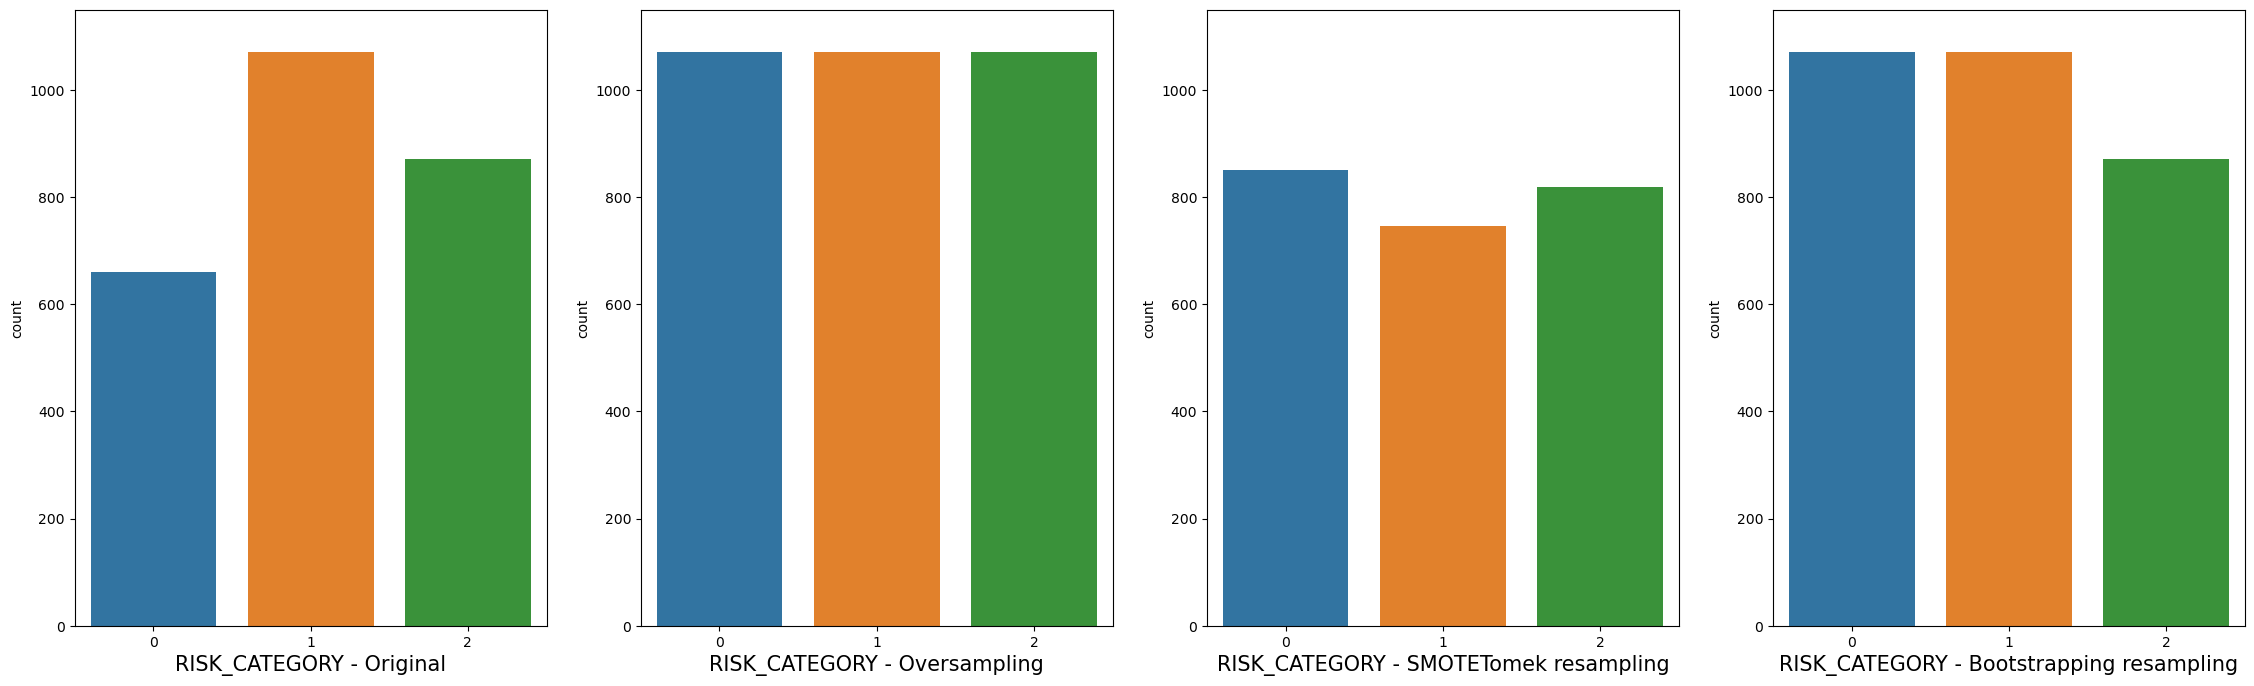

In [34]:
fig, axes =plt.subplots(1,4,figsize=(28,8))
plt.setp(axes,ylim=(0,1150))
sns.countplot(x=train_df['RISK_CATEGORY'], ax=axes[0])
ax = axes[0]
ax.set_xlabel("RISK_CATEGORY - Original",fontsize=15)
sns.countplot(x=oversampled_train_df['RISK_CATEGORY'], ax=axes[1])
ax = axes[1]
ax.set_xlabel("RISK_CATEGORY - Oversampling",fontsize=15)
sns.countplot(x=smotetomek_train_df['RISK_CATEGORY'], ax=axes[2])
ax = axes[2]
ax.set_xlabel("RISK_CATEGORY - SMOTETomek resampling",fontsize=15)
sns.countplot(x=bootstrapping_train_df['RISK_CATEGORY'], ax=axes[3])
ax = axes[3]
ax.set_xlabel("RISK_CATEGORY - Bootstrapping resampling",fontsize=15)

Now, we can see that the ratio between risk category is more balanced with the resampled data vs the original data.